11.02.2020

# A simple ABM for COSSE Presentation, 18.02.2020


# Primitive Agents and a passive Environment (Most Basic Model)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from time import time


### Define Class Agent

In [2]:
class agent:
    def __init__(self, x, y,resource_search_radius, moving_radius, fertility):
        # Position on map
        self.x = x 
        self.y = y
        # Search for resource in area with radius 
        self.resource_search_radius = resource_search_radius
        # If no resource found, move to random new position in area moving_radius
        self.moving_radius = moving_radius
        # Probability if trees to reproduce
        self.fertility = fertility
        self.hungry=False
        return 
   

### Define Trees / resource class

In [3]:
class Tree:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [4]:
def euclid_distance(a, b):
    return ((a.x-b.x)**2 + (a.y-b.y)**2 )**0.5

### Add method for agent to search for a tree

In [5]:
def search_resource(self):
    ''' returns list of nearby trees around the selected agent '''
    global trees
    trees_nearby = [tree for tree in trees 
                    if euclid_distance(tree, self) < self.resource_search_radius]
    return trees_nearby

setattr(agent, "search_resource", search_resource) # add the function to the class `agent'

### Add method for agent to move
Sample a new location within a circle with radius Moving radius

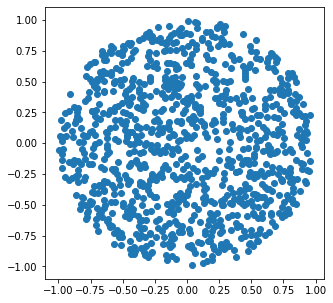

In [6]:
def move(self):
    ''' assigns a new position to selected agent within moving_radius circle'''
    searching_for_new_spot = True

    while(searching_for_new_spot):
        # Choose dx and dy in square of (moving_rad, moving_rad)
        dx = self.moving_radius* (2* np.random.random() - 1)   # value between: [-moving_rad, moving_rad]
        dy = self.moving_radius* (2* np.random.random() - 1)
        
        if (
            (dx**2+dy**2)**0.5 < self.moving_radius**2 and       # check if in circle
            self.x+dx <1 and self.x+dx >0 and self.y+dy<1 and self.y+dy>0    # check if within the Map
           ):
            # then put agent on this location
            searching_for_new_spot = False
            self.x += dx
            self.y += dy
    return 
    
setattr(agent, 'move', move) # add the function to the class `agent'

## Init

In [7]:
def init_agents(N_agents):
    global agents
    agents=[]
    for n in range(N_agents):
        x = np.random.random()   # equally distributed initial agents
        y = np.random.random()   # 
        
        # LATER
        #x = np.random.random()*0.15 + 0.1
        #y = 0
        
        ag = agent(x, y,resource_search_radius, moving_radius, fertility )  # create agent
        agents.append(ag)  # add agent to list
    return 
#init_agents(10)

In [8]:
def init_trees(N_trees):
    global trees
    trees=[]
    for n in range(int(N_trees)):
        x = np.random.random()
        y = np.random.random()
        tree = Tree(x, y)  # create tree
        trees.append(tree) # add Tree to list
    return 
#init_trees(1e3)

## Observe  = Plot the Map

In [9]:
def observe(t):
    global agents, trees
    tree_points = []
    for tree in trees:
        tree_points.append([tree.x, tree.y])
    tree_points_np = np.array(tree_points)
    agent_points = []
    for ag in agents:
        agent_points.append([ag.x, ag.y])
    agent_points_np = np.array(agent_points)
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    if len(trees)>0:
        bins=20
        plt.hist2d(tree_points_np[:,0], tree_points_np[:,1], bins=bins, cmap='Greens', vmin=0, vmax = nr_trees[0]/(bins**2))
    if len(agents)>0:
        ax.scatter(agent_points_np[:,0], agent_points_np[:,1], s=20, color='blue')
    ax.set_title("Time "+str(t))
    if len(trees)>0: plt.colorbar()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    fig.tight_layout()
    plt.savefig(folder+"map_time"+str(t)+".png")
    plt.close()
    return 

## UPDATE
 This is where the cool stuff happens

In [10]:
def update_time_step():
    ''' update one time step, i.e. perform update_single_agent() N_agents times'''
    global nr_agents, nr_trees, nr_deaths, deaths


    #start_step = time()
    
    if not len(agents)==0:
        for n in range(len(agents)): 
            # Select random agent
            ind_agent = np.random.randint(0,len(agents))
            # Update this agent
            update_single_agent(agents[ind_agent])
    
    #print("\t Time tot: ", '%.2f'  % (time()-start_step))
    
    nr_agents.append(len(agents))
    nr_trees.append(len(trees))
    nr_deaths.append(deaths)
    return 


In [11]:
def update_single_agent(ag):
    ''' for agent `ag': perform update step ''' 
    global agents, trees, deaths
    
    # search for food
    trees_nearby = ag.search_resource()  # returns a list of nearby trees next to Agent ag
    
    if len(trees_nearby)==0: # if no trees nearby

        if ag.hungry:
            # die
            deaths+=1
            agents.remove(ag)
            return
        else:
            # Phew... not dead yet, move and try next spot. But now hungry.
            ag.move()
            ag.hungry = True
    
    
    else: # nearby trees exist
        
        ### 1. Eat some tree
        
        # select random tree nearby
        cut_tree_ind = np.random.randint(0,len(trees_nearby))
        cut_tree = trees_nearby[cut_tree_ind]
        
        # Eat that tree
        trees.remove(cut_tree)
        ag.hungry = False
        
        
        ### 2. Perhaps Reproduce
        
        if np.random.random() < ag.fertility:
            # create child
            child = copy(ag)
            child.move()
            agents.append(child)
    return 
        
        

## Params

In [12]:
resource_search_radius = 0.06
moving_radius = 0.35
fertility = 0.06

## RUN

In [19]:
np.random.seed(69)

In [15]:
from pathlib import Path
folder = "./PrimAg_passEnv_TestSeed69/"#"../basicfigs/init_atedge_seed69/"
Path(folder).mkdir(parents=True, exist_ok=True)


In [16]:
init_agents(10)
init_trees(1e4)

print("Time (#agents, #trees): ")
nr_agents = []
nr_trees = []
nr_deaths = []

# Time Loop
N_time_steps =250
for t in range(N_timesteps):
    deaths = 0
    print(str(t)+" \t ("+str(len(agents))+", "+str(len(trees))+")")#, end=", ")
        
    update_time_step()
    observe(t)
    
    

Time (#agents, #trees): 
0 	 (10, 10000)
1 	 (10, 9990)
2 	 (10, 9980)
3 	 (10, 9970)
4 	 (11, 9960)
5 	 (11, 9949)
6 	 (11, 9938)
7 	 (11, 9927)
8 	 (11, 9916)
9 	 (11, 9905)


# Analysis and Plot

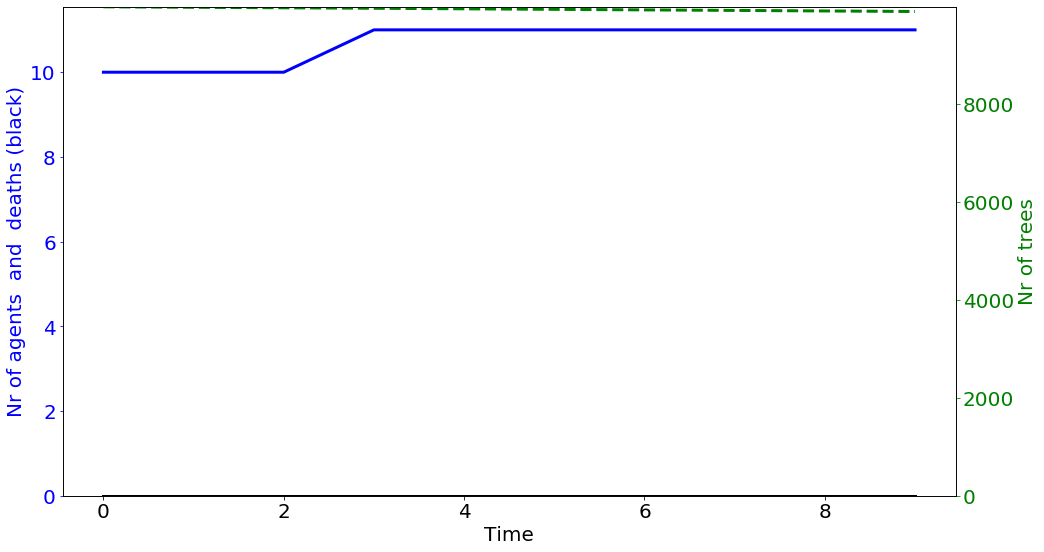

In [17]:
rcParam = {'font.size':20}
plt.rcParams.update(rcParam)
fig = plt.figure(figsize=(16,9))
ax_agent = fig.add_subplot(111)
ax_tree = ax_agent.twinx()
ax_agent.plot(nr_agents[:], '-',lw=3, color='blue')
ax_agent.plot(nr_deaths[:], '-', lw=3, color='black')
ax_tree.plot(nr_trees[:], '--', lw=3, color='green')
ax_tree.set_ylabel("Nr of trees")
ax_agent.set_ylabel(r"Nr of agents  and  deaths (black)")
ax_agent.tick_params(axis="y", colors='blue')
ax_agent.yaxis.label.set_color("blue")
ax_tree.tick_params(axis="y", colors='green')
ax_tree.yaxis.label.set_color("green")
ax_agent.set_xlabel("Time")
ax_agent.set_ylim(0,)
ax_tree.set_ylim(0,)
plt.savefig(folder+"run_counts.png")
#ax_tree.yaxis.tick_params(colors='green')

In [20]:
import imageio
images = []
filenames=[folder+"/map_time"+str(t)+".png" for t in range(N_time_steps)]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(folder+'/movie.gif', images)